# Mapping Global CO$_2$ Emissions: Part 2

Now that we've merged the CDIAC-FF emissions data with a GeoDataFrame of nations, we can do some more exploring:

- Simple `applymap`
- Some more bubble plots
- Introduce `dissolve`
- Emissions by Fuel Type and continent
- Pie charts by continent


In [69]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd

#### Let's load in the carbon_gdf from last time...

In [70]:
carbon_gdf = gpd.read_file('Data/Emissions_Map_2017/Emissions_Map_2017.shp')

In [71]:
carbon_gdf.head()

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  \
0  Admin-0 sovereignty          5          2  Indonesia    IDN         0   
1  Admin-0 sovereignty          5          3   Malaysia    MYS         0   
2  Admin-0 sovereignty          0          2      Chile    CHL         0   
3  Admin-0 sovereignty          0          3    Bolivia    BOL         0   
4  Admin-0 sovereignty          0          2       Peru    PER         0   

   LEVEL               TYPE TLC      ADMIN  ...   Total_C   Solid_C  Liquid_C  \
0      2  Sovereign country   1  INDONESIA  ...  3.335147  0.717693  1.760209   
1      2  Sovereign country   1   MALAYSIA  ...  1.376270  0.225447  0.617639   
2      2  Sovereign country   1      CHILE  ...  0.727260  0.224217  0.388357   
3      2  Sovereign country   1    BOLIVIA  ...  0.125241  0.000064  0.073097   
4      2  Sovereign country   1       PERU  ...  0.485311  0.030093  0.354135   

      Gas_C  Cement_C Flaring_C  Bunker_C  iso_a3_1        PC  \
0  0.598907  0.132688  0.125650  0.036048       IDN  0.531158   
1  0.403237  0.058839  0.071103  0.037174       MYS  2.118419   
2  0.074999  0.018229  0.021452  0.026363       CHL  1.220396   
3  0.037803  0.005848  0.008435  0.001106       BOL  0.515239   
4  0.052653  0.024675  0.023766  0.014200       PER  0.438444   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  
1  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...  
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...  

[5 rows x 188 columns]

### Use `applymap()` to answer some simple questions...

- Let's do some simple operations on each country to get some insight


#### Where do cumulative emissions exceed some percentile?

In [78]:
#Let's see everywhere *cumulative* emissions exceeded some percentile:
####

gdf2 = carbon_gdf.copy()

#Define our lambda function:
#(Don't actually have to use lambda keyword)
f = lambda x, thresh, var: 1 if x >= np.percentile(var, thresh) else 0


#Use applymap:
gdf2['Exceeds'] = gdf2[['Total_C']].applymap(f, var = gdf2['Total_C'].dropna(), thresh = 95)

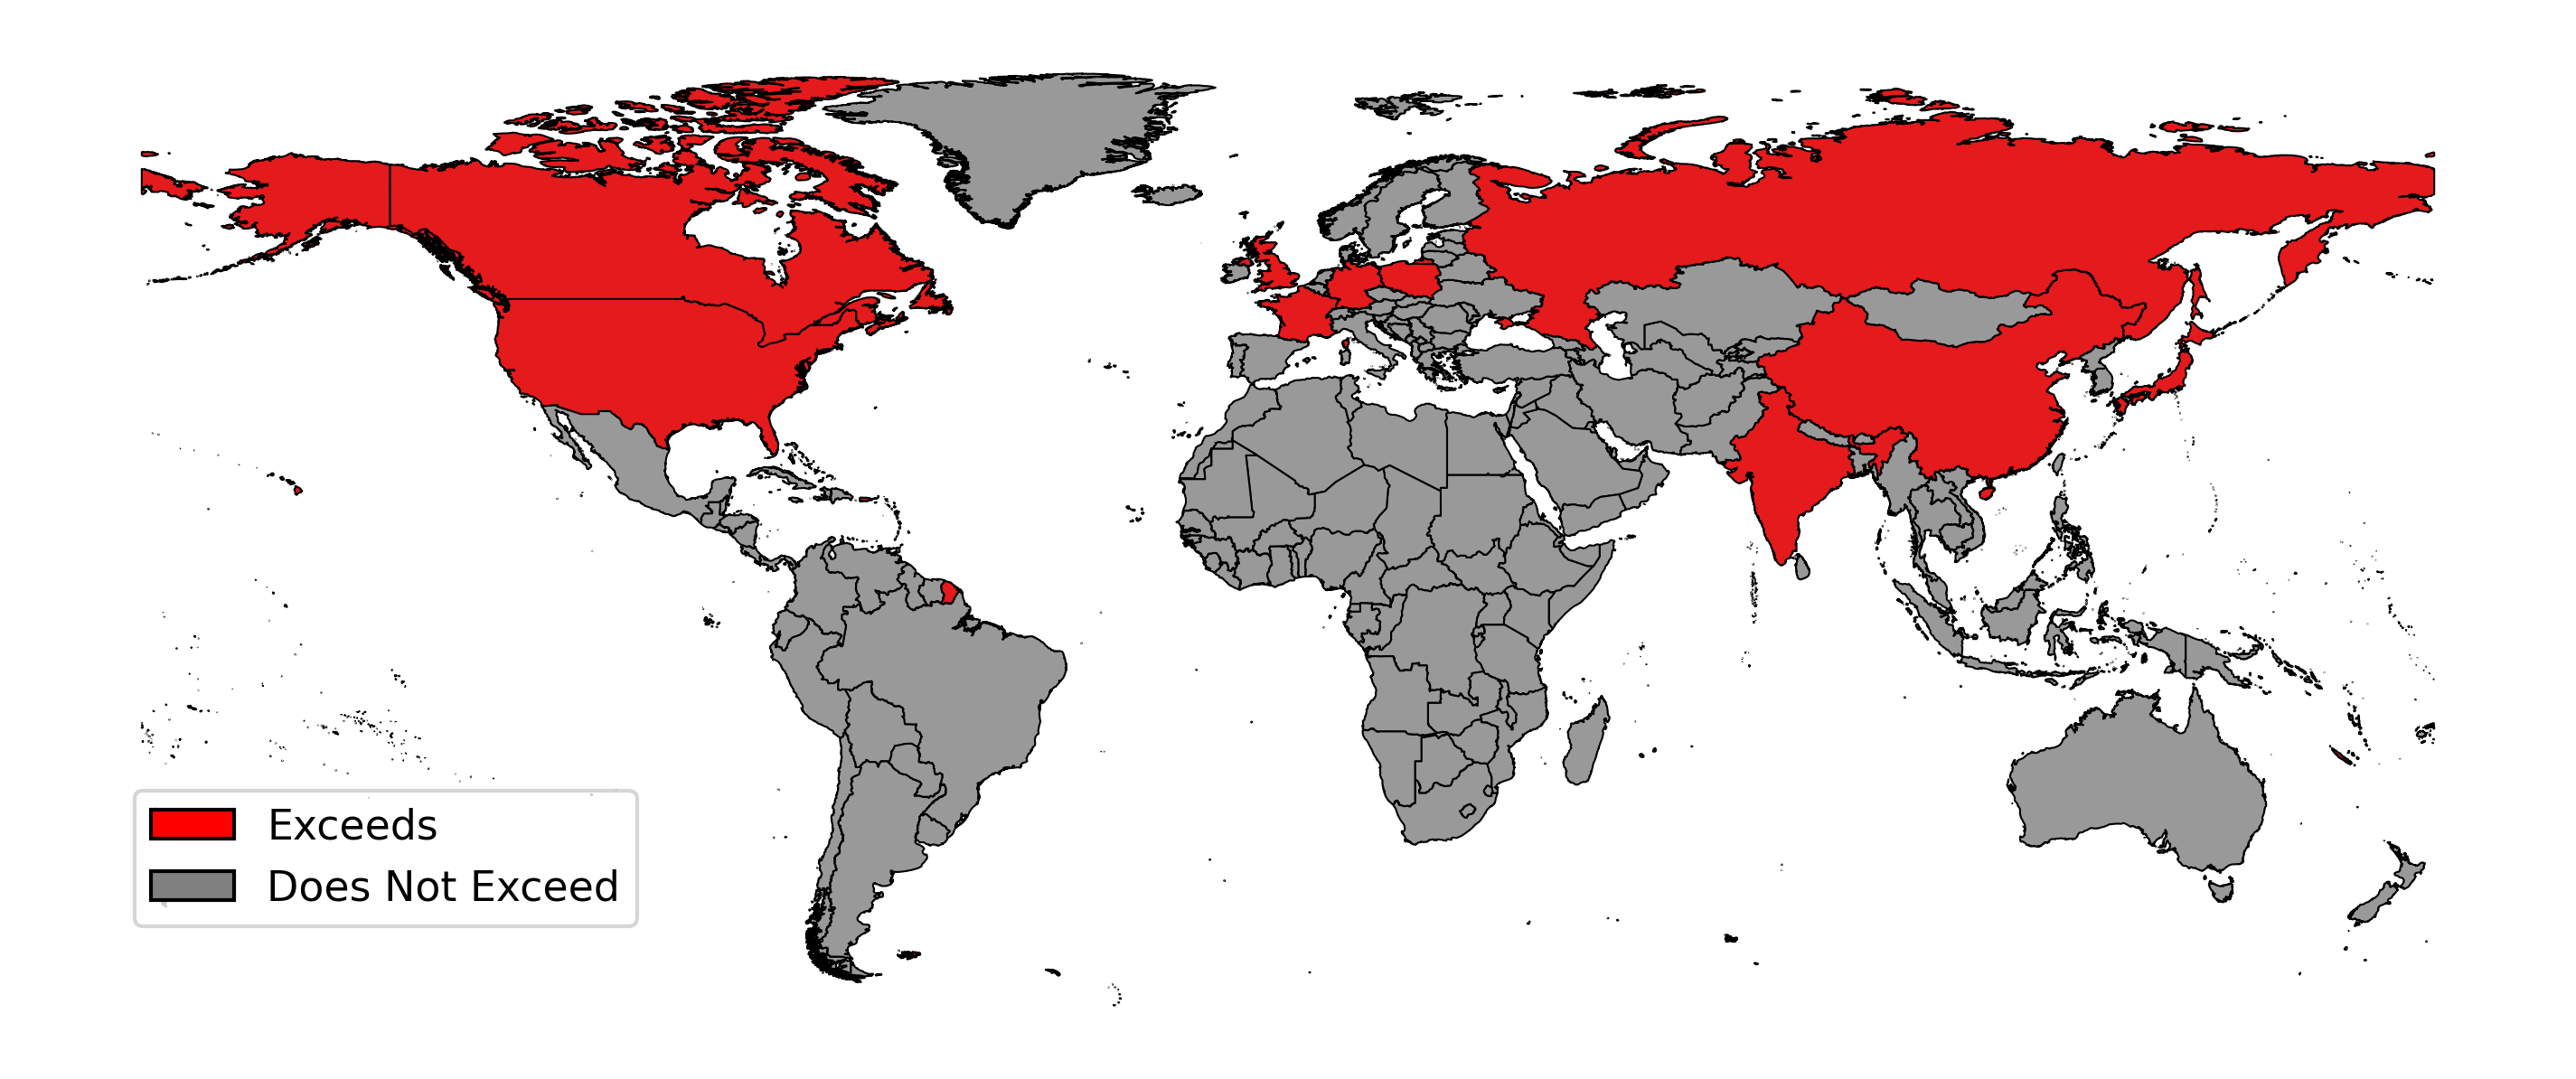

In [79]:
#And now we can plot the results:
#####

fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)
gdf2.plot(column = 'Exceeds', cmap='Set1_r', edgecolor='black', linewidth=.5, ax=ax1)

ax1.set_axis_off()


#Set a custom legend:
#######
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='red', edgecolor='black', alpha=1, label='Exceeds'),
                   Patch(facecolor='grey', edgecolor='black', alpha=1, label='Does Not Exceed')]

ax1.legend(handles=legend_elements, fontsize=11, bbox_to_anchor=(0.25, .275));


### Question: How many countries gave us 50%, 75%, 90%, etc. of 2017 emissions?

Here's one way I can think of to answer this...

In [80]:
#First, sort by emissions
######

sort_var = 'Total'

carbon_gdf_sorted = carbon_gdf.sort_values(by = sort_var, ascending = False)

carbon_gdf_sorted

featurecla  scalerank  LABELRANK                SOVEREIGNT  \
9    Admin-0 sovereignty          0          2                     China   
147  Admin-0 sovereignty          0          2  United States of America   
8    Admin-0 sovereignty          0          2                     India   
45   Admin-0 sovereignty          0          2                    Russia   
171  Admin-0 sovereignty          5          2                     Japan   
..                   ...        ...        ...                       ...   
159  Admin-0 sovereignty          0          6                   Vatican   
160  Admin-0 sovereignty          1          6           Northern Cyprus   
161  Admin-0 sovereignty          1          9       Cyprus No Mans Area   
162  Admin-0 sovereignty          0          5                   Kashmir   
201  Admin-0 sovereignty          6          6           Spratly Islands   

    SOV_A3  ADM0_DIF  LEVEL               TYPE  TLC                     ADMIN  \
9      CH1         0      1        Sovereignty  NaN                     CHINA   
147    US1         0      1        Sovereignty  NaN  UNITED STATES OF AMERICA   
8      IND         0      2  Sovereign country    1                     INDIA   
45     RUS         0      2  Sovereign country    1                    RUSSIA   
171    JPN         0      2  Sovereign country    1                     JAPAN   
..     ...       ...    ...                ...  ...                       ...   
159    VAT         0      2  Sovereign country    1                   VATICAN   
160    CYN         0      2  Sovereign country    1           NORTHERN CYPRUS   
161    CNM         0      2      Indeterminate  NaN       CYPRUS NO MANS AREA   
162    KAS         0      2      Indeterminate  NaN           SIACHEN GLACIER   
201    PGA         0      2      Indeterminate    1           SPRATLY ISLANDS   

     ...     Total_C    Solid_C   Liquid_C      Gas_C  Cement_C Flaring_C  \
9    ...   54.457915  42.327190   7.651261   1.207374  3.263736  0.008355   
147  ...  106.580008  46.225736  40.114766  19.227174  0.712535  0.299800   
8    ...   13.215139   8.915519   3.229505   0.477056  0.549068  0.043996   
45   ...   11.858257   3.217171   2.653961   5.703969  0.143654  0.139507   
171  ...   15.608275   4.978876   8.563018   1.543446  0.522576  0.000364   
..   ...         ...        ...        ...        ...       ...       ...   
159  ...         NaN        NaN        NaN        NaN       NaN       NaN   
160  ...         NaN        NaN        NaN        NaN       NaN       NaN   
161  ...         NaN        NaN        NaN        NaN       NaN       NaN   
162  ...         NaN        NaN        NaN        NaN       NaN       NaN   
201  ...         NaN        NaN        NaN        NaN       NaN       NaN   

     Bunker_C  iso_a3_1        PC  \
9    0.191076       CHN  1.882315   
147  1.675645       USA  4.075261   
8    0.090048       IND  0.490916   
45   0.144994       RUS  3.418473   
171  0.558742       JPN  2.485116   
..        ...       ...       ...   
159       NaN       NaN       NaN   
160       NaN       NaN       NaN   
161       NaN       NaN       NaN   
162       NaN       NaN       NaN   
201       NaN       NaN       NaN   

                                              geometry  
9    MULTIPOLYGON (((78.91769 33.38626, 78.91595 33...  
147  MULTIPOLYGON (((-122.75302 48.99251, -122.6532...  
8    MULTIPOLYGON (((77.80035 35.49541, 77.81533 35...  
45   MULTIPOLYGON (((87.81632 49.16584, 87.71638 49...  
171  MULTIPOLYGON (((129.78321 31.79963, 129.79086 ...  
..                                                 ...  
159  POLYGON ((12.45314 41.90275, 12.45271 41.90302...  
160  MULTIPOLYGON (((34.01229 35.06380, 34.00891 35...  
161  MULTIPOLYGON (((33.90651 35.06910, 33.90659 35...  
162  POLYGON ((77.04897 35.11044, 76.91316 35.37828...  
201  MULTIPOLYGON (((115.36720 10.23749, 115.36598 ...  

[202 rows x 188 columns]

In [81]:
#Now, let's take the cumulative sum
#Fill NAs with 0:

cs_series = carbon_gdf_sorted.fillna(0)[sort_var].cumsum()

#Note that this is a Series: Index-value link preserved
#Have total in GtC = cumulative total
cs_series / 1e6

9      2.646277
147    3.997615
8      4.668411
45     5.161948
171    5.475731
         ...   
159    9.213724
160    9.213724
161    9.213724
162    9.213724
201    9.213724
Name: Total, Length: 202, dtype: float64

In [82]:
#Now, we can easily grab the indices that give us >X% of Emissions
#Note total emissions is our final value in the Series:
total_emissions = cs_series.iloc[len(cs_series)-1]

total_emissions / 1e6


9.213724

In [85]:
#Get a list of indices that, when added, sum to < 75% of the final total:
index_list = cs_series.loc[cs_series < total_emissions*.75].index

#Plus one more index:
#Add one more:
index_list = index_list.append(cs_series.iloc[[len(index_list)]].index)

index_list

Int64Index([9, 147, 8, 45, 171, 89, 47, 23, 101, 148, 0, 42, 35, 149, 63], dtype='int64')

In [86]:
#Confirm we got it right:
gdf2.loc[index_list].Total.sum() / total_emissions


0.758810769673587

In [87]:
#And what countries were these?
gdf2.loc[index_list].ADMIN

9                         CHINA
147    UNITED STATES OF AMERICA
8                         INDIA
45                       RUSSIA
171                       JAPAN
89                         IRAN
47                      GERMANY
23                  SOUTH KOREA
101                SAUDI ARABIA
148                      CANADA
0                     INDONESIA
42                       BRAZIL
35                 SOUTH AFRICA
149                      MEXICO
63                       TURKEY
Name: ADMIN, dtype: object

C:\Users\steff\AppData\Local\Temp\ipykernel_7908\2526399362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf2['Top'].loc[index_list] = 1


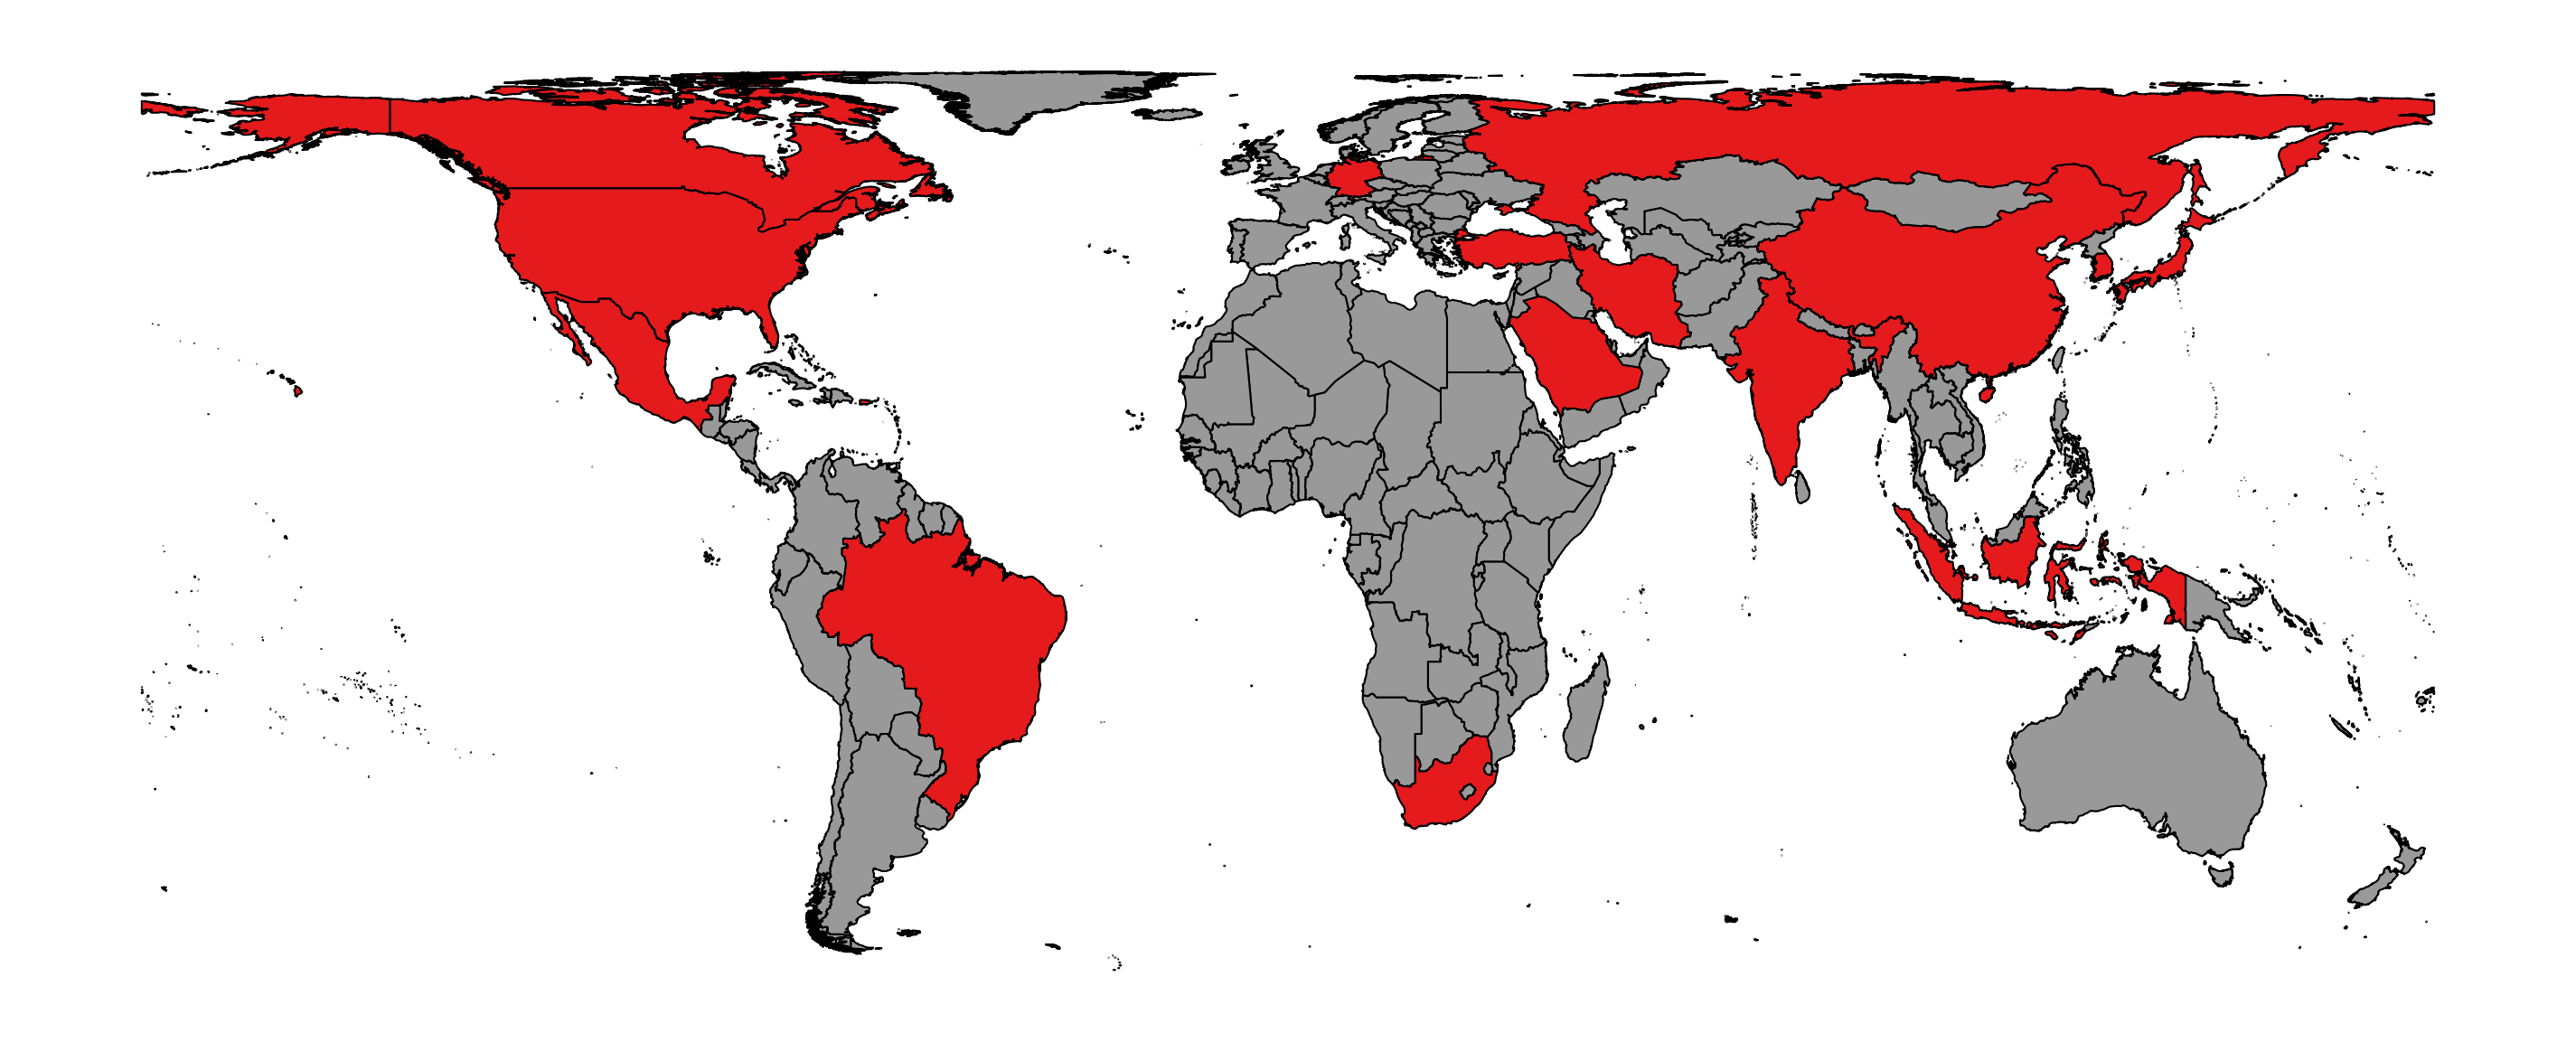

In [92]:
#Plot these fellows:
#Can add a new column to indicate if in group that gave 75% of all emissions:
gdf2['Top'] = 0
gdf2['Top'].loc[index_list] = 1

#Plot
fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)
gdf2.plot(column = 'Top', cmap='Set1_r', edgecolor='black', linewidth=.5, ax=ax1)

ax1.set_axis_off()


### Associated *Land* Area?

- Need equal area projection...

In [89]:
#Let's use cylindrical equal-area

gdf2 = gdf2.to_crs(6933)

In [91]:
#And area fraction?
gdf2.loc[gdf2.Top == 1].area.sum() / gdf2.area.sum()

0.5028230815728842

So, about 50% of all land area (not including Antarctica) was responsible for 75% of CO$_2$ emissions in 2017.

### Associated Population?

In [93]:
gdf2.loc[gdf2.Top == 1].POP_EST.sum() / gdf2.POP_EST.sum()

0.5751584584703098

And about 57.5% of the world's population was responsible for 75% of CO$_2$ emissions in 2017.

## Depict Emissions using Centroids

We can make a bubble plot to represent emissions using centroids...

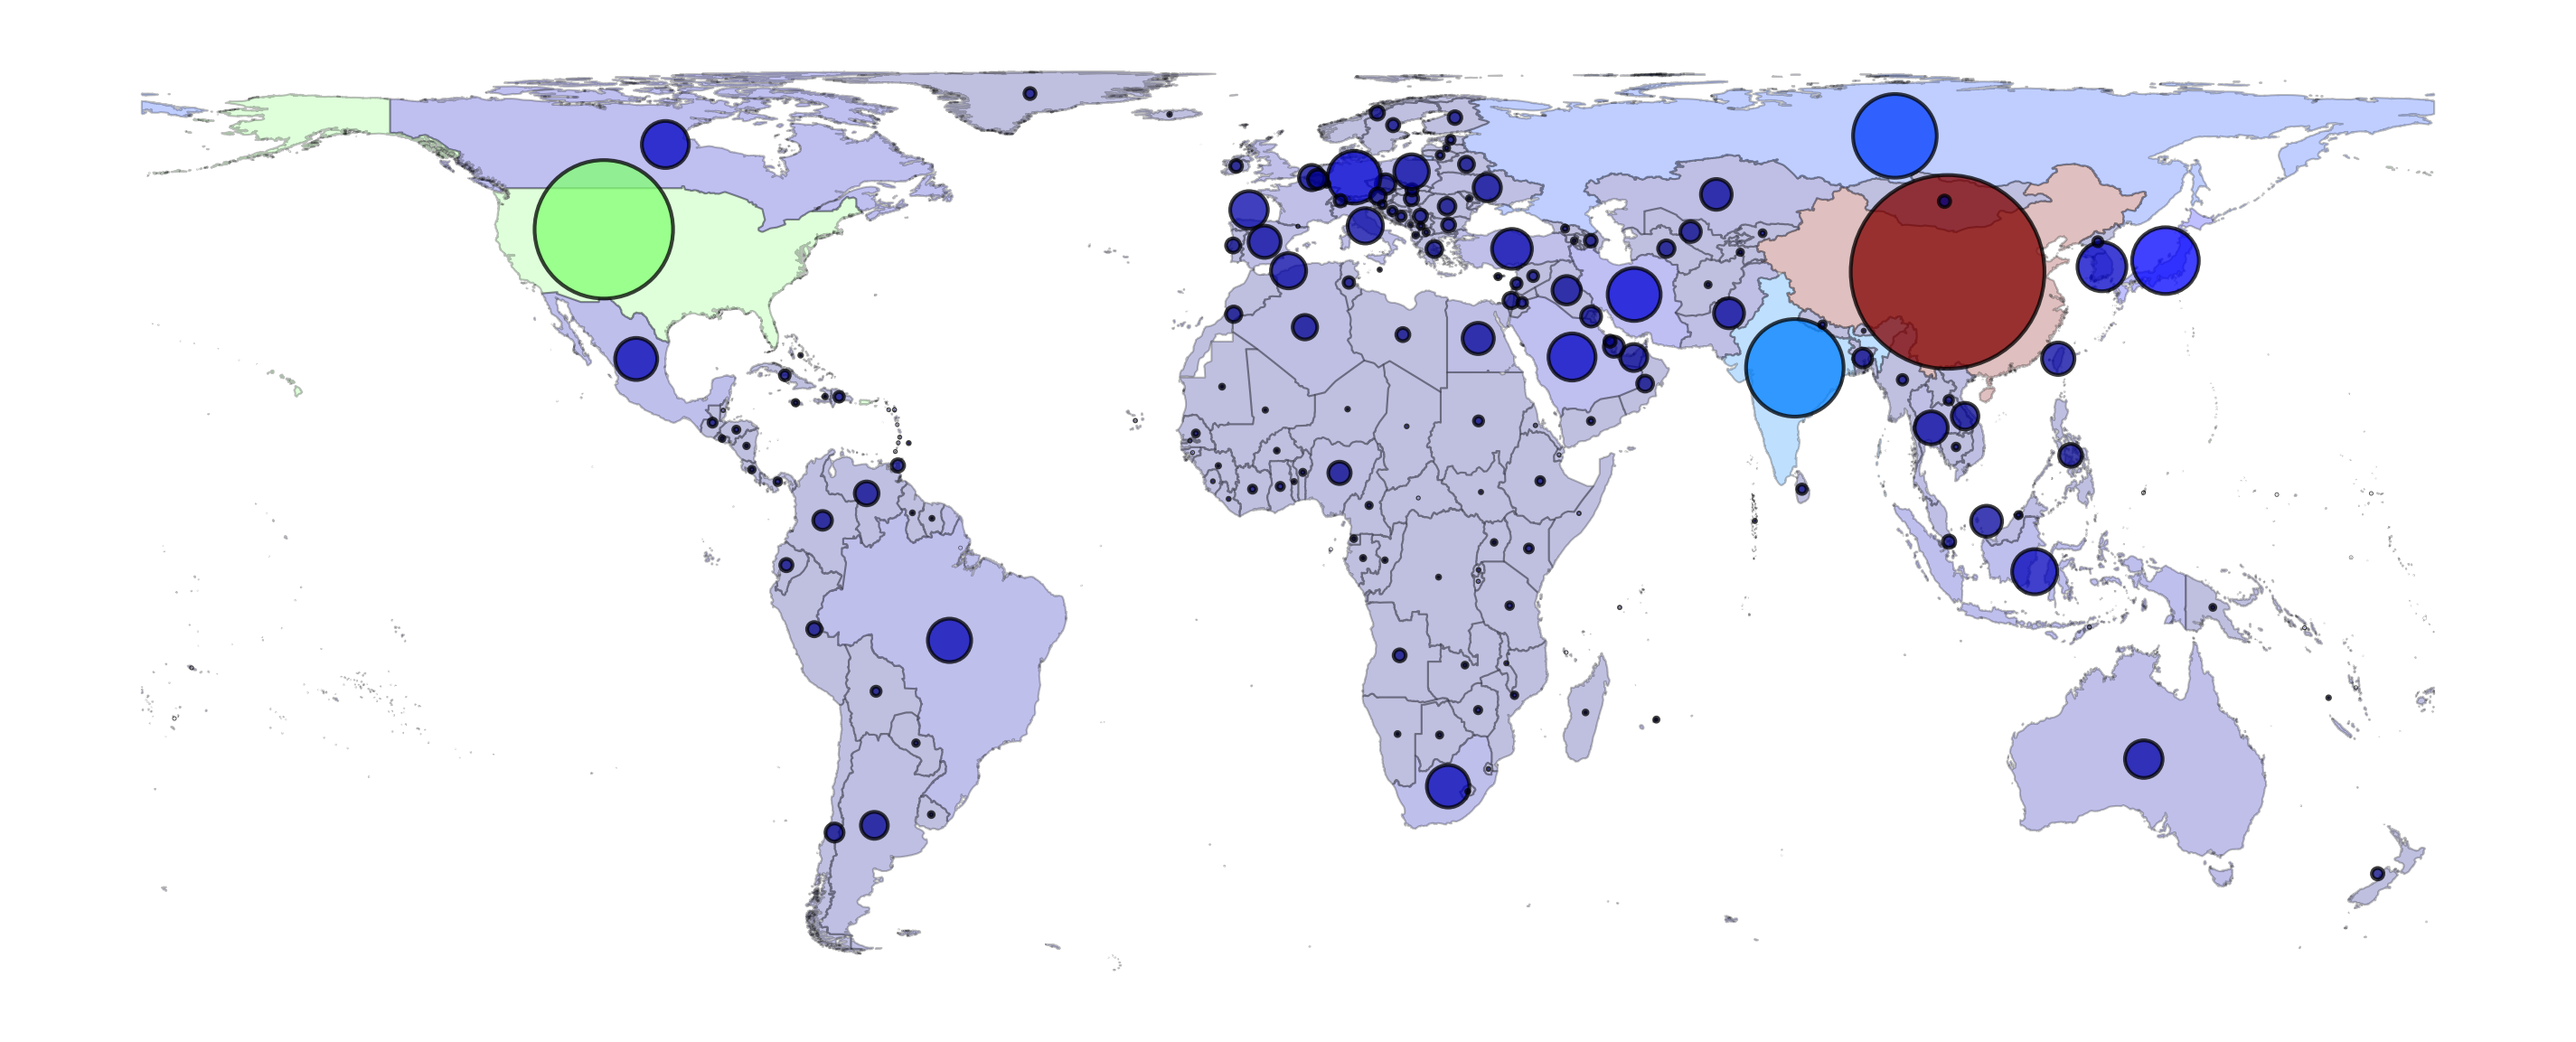

In [94]:
#Convert to an equal-area projection, just as above
carbon_gdf_6933 = carbon_gdf.to_crs(epsg = 6933)

carbon_gdf_6933['centroid_column'] = carbon_gdf_6933.centroid

#We can set geometry:
gdf2 = carbon_gdf_6933.set_geometry('centroid_column')


fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

#Need to drop NA: markersize and column handle NaNs differently!
plot_var = 'Total'
gdf2 = gdf2.dropna(subset=[plot_var])


#And plots:

carbon_gdf_6933.plot(ax = ax1, column = carbon_gdf_6933[plot_var], cmap='jet', alpha=.25,
                                edgecolor='black', linewidth=.5)

gdf2.plot(ax = ax1, markersize = gdf2[plot_var]/1e3, column = gdf2[plot_var], alpha = .75,
                edgecolor = 'black', cmap='jet');

ax1.set_axis_off()

### Grouping by Continent: Need a `dissolve` operation vs. `groupby`

- **Group by continent using `dissolve`**


- **Aggregation (`aggfunc`) options for `dissolve`:**

    - `first`
    - `last`
    - `min`
    - `max`
    - `sum`
    - `mean`
    - `median`


- Plus a few more plots

In [95]:
#Sum everything up, Per_Capita and many other variables become meaningless, but it's okay
#######

gdf_continent = carbon_gdf.dissolve(by='CONTINENT', aggfunc=sum)

In [96]:
gdf_continent

geometry  \
CONTINENT                                                                    
Africa                   MULTIPOLYGON (((-16.05565 11.04947, -16.07616 ...   
Asia                     MULTIPOLYGON (((53.26807 12.12883, 53.28688 12...   
Europe                   MULTIPOLYGON (((-144.33837 -27.63372, -144.346...   
North America            MULTIPOLYGON (((-168.17309 -14.52370, -168.163...   
Oceania                  MULTIPOLYGON (((-176.21760 -44.32724, -176.221...   
Seven seas (open ocean)  MULTIPOLYGON (((57.72926 -20.36395, 57.71225 -...   
South America            MULTIPOLYGON (((-75.15514 -50.55104, -75.16637...   

                         scalerank  LABELRANK  ADM0_DIF  LEVEL  GEOU_DIF  \
CONTINENT                                                                  
Africa                          14        203         0    108         0   
Asia                            44        193         2     99         0   
Europe                          11        196         0     85         0   
North America                   33        107         1     44         0   
Oceania                         61         63         0     26         0   
Seven seas (open ocean)         15         16         0      6         0   
South America                    0         35         0     24         0   

                         SU_DIF  BRK_DIFF  MAPCOLOR7  MAPCOLOR8  ...  \
CONTINENT                                                        ...   
Africa                        0         1        166        190  ...   
Asia                          0         3        167        180  ...   
Europe                        1         0        131        158  ...   
North America                 0         0         65         76  ...   
Oceania                       1         0         43         48  ...   
Seven seas (open ocean)       0         0          8         14  ...   
South America                 0         0         33         36  ...   

                         Per_Capita    Bunker     Total_C    Solid_C  \
CONTINENT                                                              
Africa                        14.67   10301.0   11.703300   5.127000   
Asia                          89.67  149520.0  121.247336  64.673149   
Europe                        68.77   89880.0   97.415187  52.325263   
North America                 29.69   52042.0  121.848018  49.184950   
Oceania                       14.02    5528.0    5.086158   2.825955   
Seven seas (open ocean)        3.46     784.0    0.037425   0.007125   
South America                  9.37   10784.0   10.763263   1.215453   

                          Liquid_C      Gas_C  Cement_C  Flaring_C  Bunker_C  \
CONTINENT                                                                      
Africa                    4.010745   1.382807  0.470180   0.712597  0.443276   
Asia                     36.819881  12.303422  5.983480   1.467425  3.465127   
Europe                   27.046437  16.081716  1.726489   0.235281  3.263296   
North America            48.552928  22.545765  1.029996   0.534397  2.120889   
Oceania                   1.613996   0.583108  0.056925   0.006186  0.182852   
Seven seas (open ocean)   0.030302   0.000000  0.000000   0.000000  0.014180   
South America             6.698674   1.926850  0.394453   0.527844  0.348919   

                                PC  
CONTINENT                           
Africa                   14.059448  
Asia                     86.246077  
Europe                   69.819609  
North America            29.279664  
Oceania                  13.605789  
Seven seas (open ocean)   3.387344  
South America             9.243843  

[7 rows x 49 columns]

C:\Users\steff\AppData\Local\Temp\ipykernel_7908\2817852980.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_continent['cent'] = gdf_continent.centroid


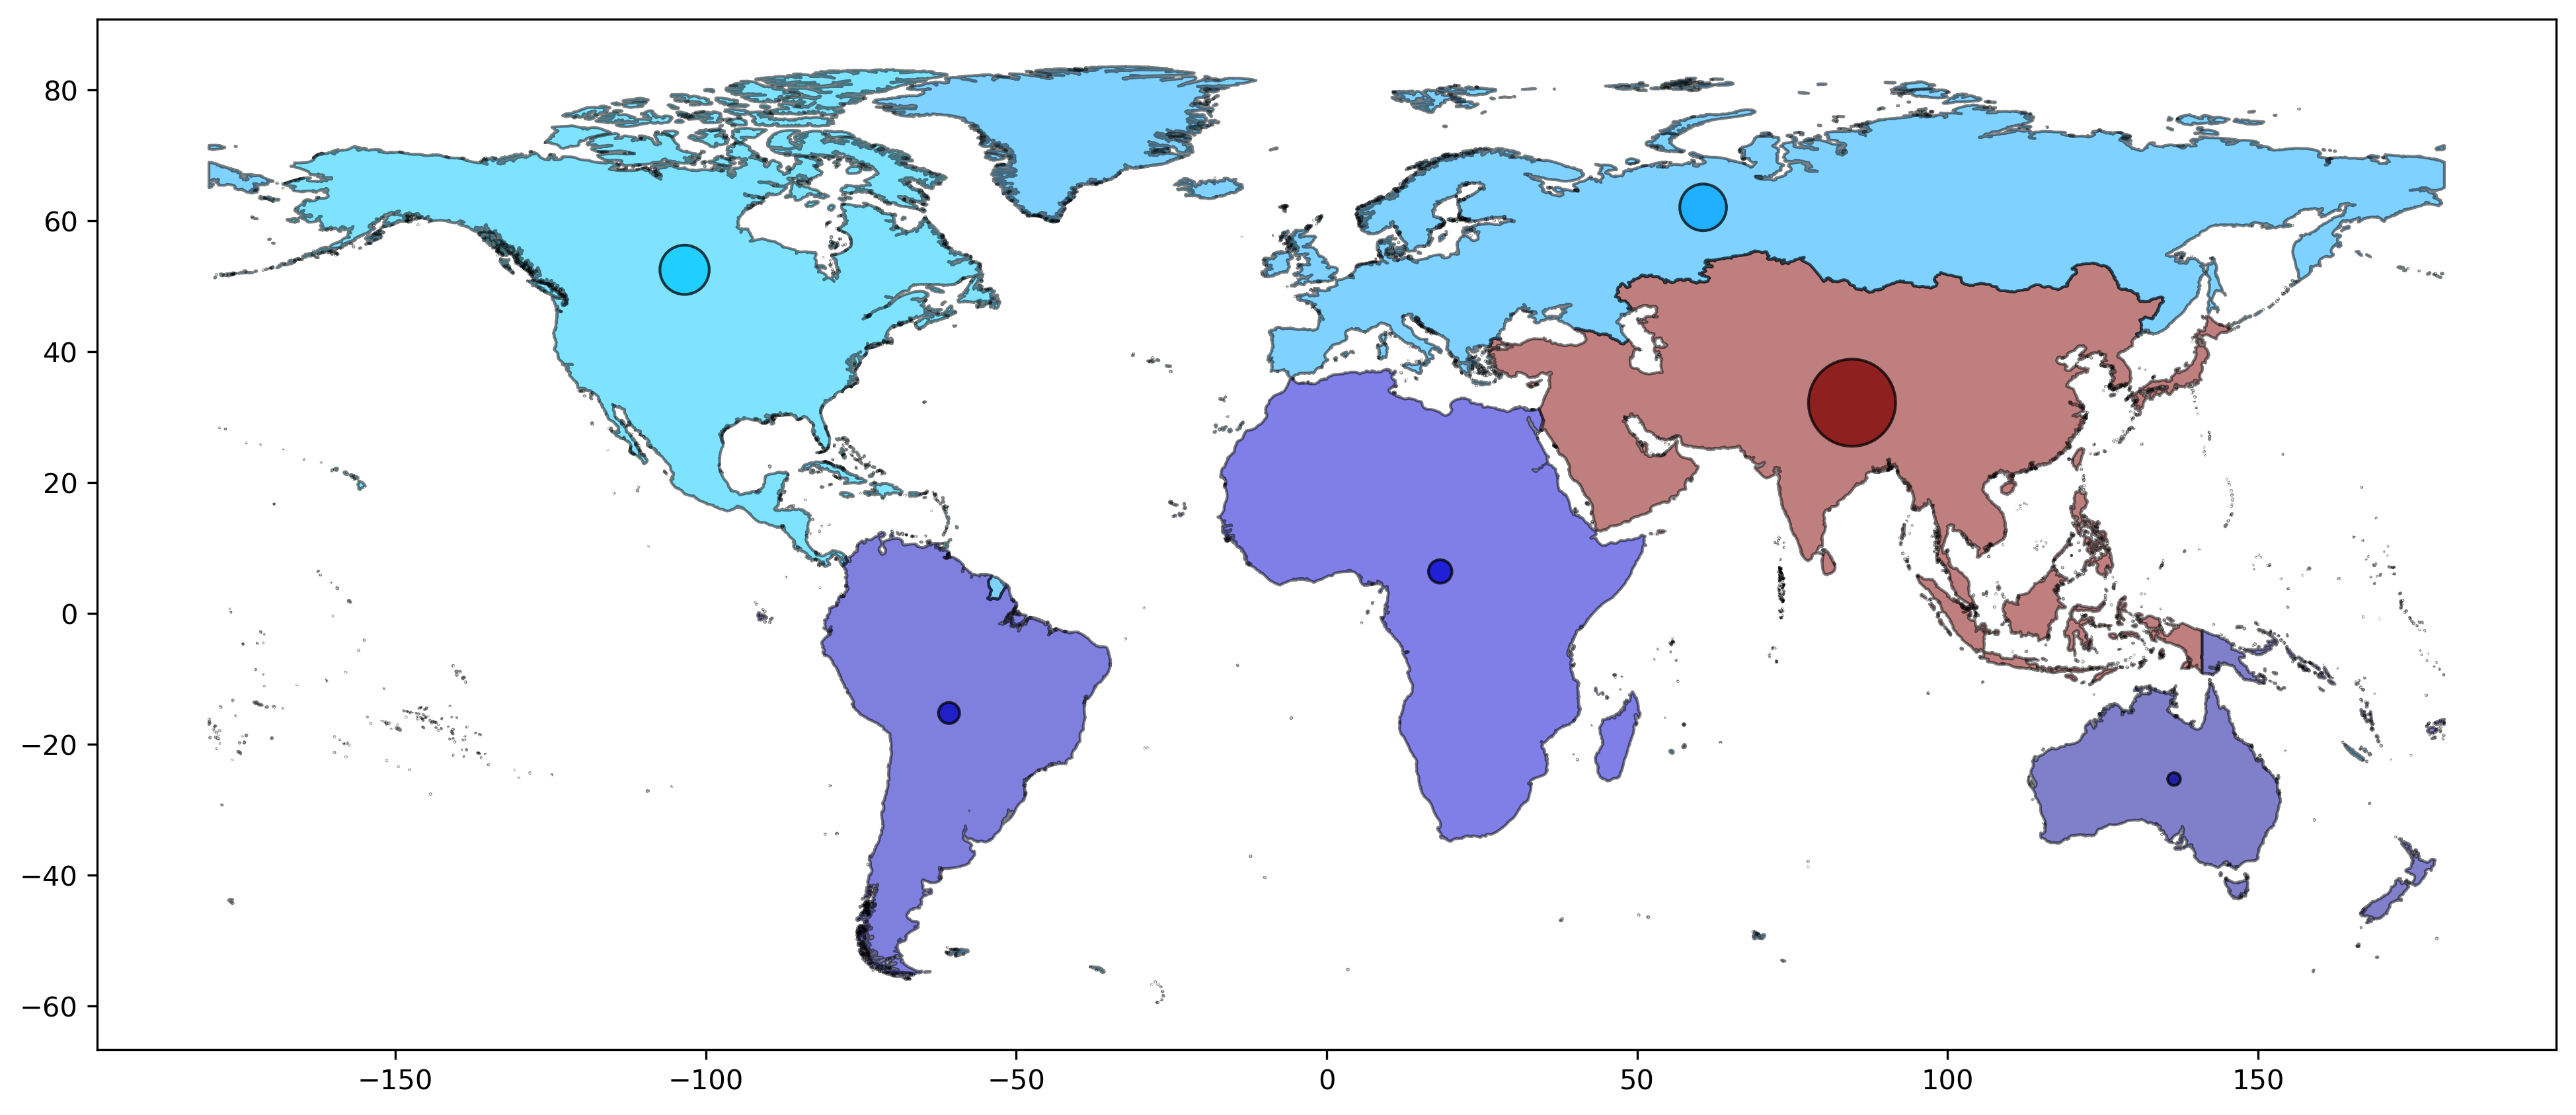

In [98]:
#Plot again with both choropleth and centroids
##########

gdf_continent['cent'] = gdf_continent.centroid

fig, ax1 = plt.subplots(1,1, figsize=(16, 8), dpi=300)

plot_var = 'Total'

#And plots:

#Plot the polygons
gdf_continent = gdf_continent.set_geometry('geometry')
gdf_continent.plot(ax = ax1, edgecolor='black', column = gdf_continent[plot_var], cmap='jet', alpha=.5, linewidth=1)

#And the centroids
gdf_continent = gdf_continent.set_geometry('cent')
gdf_continent.plot(ax = ax1, markersize = gdf_continent[plot_var] / np.max(gdf_continent[plot_var])*1000,
                column = gdf_continent[plot_var], alpha = .75,
                edgecolor = 'black', cmap='jet');


### Pie Plots by Fossil Source?

- Let's combine inset axes + pandas melt operation

In [99]:
#What do we have to start with?
gdf_continent

geometry  \
CONTINENT                                                                    
Africa                   MULTIPOLYGON (((-16.05565 11.04947, -16.07616 ...   
Asia                     MULTIPOLYGON (((53.26807 12.12883, 53.28688 12...   
Europe                   MULTIPOLYGON (((-144.33837 -27.63372, -144.346...   
North America            MULTIPOLYGON (((-168.17309 -14.52370, -168.163...   
Oceania                  MULTIPOLYGON (((-176.21760 -44.32724, -176.221...   
Seven seas (open ocean)  MULTIPOLYGON (((57.72926 -20.36395, 57.71225 -...   
South America            MULTIPOLYGON (((-75.15514 -50.55104, -75.16637...   

                         scalerank  LABELRANK  ADM0_DIF  LEVEL  GEOU_DIF  \
CONTINENT                                                                  
Africa                          14        203         0    108         0   
Asia                            44        193         2     99         0   
Europe                          11        196         0     85         0   
North America                   33        107         1     44         0   
Oceania                         61         63         0     26         0   
Seven seas (open ocean)         15         16         0      6         0   
South America                    0         35         0     24         0   

                         SU_DIF  BRK_DIFF  MAPCOLOR7  MAPCOLOR8  ...  \
CONTINENT                                                        ...   
Africa                        0         1        166        190  ...   
Asia                          0         3        167        180  ...   
Europe                        1         0        131        158  ...   
North America                 0         0         65         76  ...   
Oceania                       1         0         43         48  ...   
Seven seas (open ocean)       0         0          8         14  ...   
South America                 0         0         33         36  ...   

                           Bunker     Total_C    Solid_C   Liquid_C  \
CONTINENT                                                             
Africa                    10301.0   11.703300   5.127000   4.010745   
Asia                     149520.0  121.247336  64.673149  36.819881   
Europe                    89880.0   97.415187  52.325263  27.046437   
North America             52042.0  121.848018  49.184950  48.552928   
Oceania                    5528.0    5.086158   2.825955   1.613996   
Seven seas (open ocean)     784.0    0.037425   0.007125   0.030302   
South America             10784.0   10.763263   1.215453   6.698674   

                             Gas_C  Cement_C  Flaring_C  Bunker_C         PC  \
CONTINENT                                                                      
Africa                    1.382807  0.470180   0.712597  0.443276  14.059448   
Asia                     12.303422  5.983480   1.467425  3.465127  86.246077   
Europe                   16.081716  1.726489   0.235281  3.263296  69.819609   
North America            22.545765  1.029996   0.534397  2.120889  29.279664   
Oceania                   0.583108  0.056925   0.006186  0.182852  13.605789   
Seven seas (open ocean)   0.000000  0.000000   0.000000  0.014180   3.387344   
South America             1.926850  0.394453   0.527844  0.348919   9.243843   

                                                cent  
CONTINENT                                             
Africa                      POINT (18.27876 6.42695)  
Asia                       POINT (84.60168 32.21977)  
Europe                     POINT (60.61819 62.07712)  
North America            POINT (-103.41158 52.53365)  
Oceania                  POINT (136.45540 -25.30018)  
Seven seas (open ocean)   POINT (57.53234 -16.97918)  
South America            POINT (-60.82458 -15.20515)  

[7 rows x 50 columns]

In [100]:
#Want Continent back to being a column, so we do this:
gdf_continent = gdf_continent.reset_index(drop=False)

In [101]:
gdf_continent

CONTINENT                                           geometry  \
0                   Africa  MULTIPOLYGON (((-16.05565 11.04947, -16.07616 ...   
1                     Asia  MULTIPOLYGON (((53.26807 12.12883, 53.28688 12...   
2                   Europe  MULTIPOLYGON (((-144.33837 -27.63372, -144.346...   
3            North America  MULTIPOLYGON (((-168.17309 -14.52370, -168.163...   
4                  Oceania  MULTIPOLYGON (((-176.21760 -44.32724, -176.221...   
5  Seven seas (open ocean)  MULTIPOLYGON (((57.72926 -20.36395, 57.71225 -...   
6            South America  MULTIPOLYGON (((-75.15514 -50.55104, -75.16637...   

   scalerank  LABELRANK  ADM0_DIF  LEVEL  GEOU_DIF  SU_DIF  BRK_DIFF  \
0         14        203         0    108         0       0         1   
1         44        193         2     99         0       0         3   
2         11        196         0     85         0       1         0   
3         33        107         1     44         0       0         0   
4         61         63         0     26         0       1         0   
5         15         16         0      6         0       0         0   
6          0         35         0     24         0       0         0   

   MAPCOLOR7  ...    Bunker     Total_C    Solid_C   Liquid_C      Gas_C  \
0        166  ...   10301.0   11.703300   5.127000   4.010745   1.382807   
1        167  ...  149520.0  121.247336  64.673149  36.819881  12.303422   
2        131  ...   89880.0   97.415187  52.325263  27.046437  16.081716   
3         65  ...   52042.0  121.848018  49.184950  48.552928  22.545765   
4         43  ...    5528.0    5.086158   2.825955   1.613996   0.583108   
5          8  ...     784.0    0.037425   0.007125   0.030302   0.000000   
6         33  ...   10784.0   10.763263   1.215453   6.698674   1.926850   

   Cement_C  Flaring_C  Bunker_C         PC                         cent  
0  0.470180   0.712597  0.443276  14.059448     POINT (18.27876 6.42695)  
1  5.983480   1.467425  3.465127  86.246077    POINT (84.60168 32.21977)  
2  1.726489   0.235281  3.263296  69.819609    POINT (60.61819 62.07712)  
3  1.029996   0.534397  2.120889  29.279664  POINT (-103.41158 52.53365)  
4  0.056925   0.006186  0.182852  13.605789  POINT (136.45540 -25.30018)  
5  0.000000   0.000000  0.014180   3.387344   POINT (57.53234 -16.97918)  
6  0.394453   0.527844  0.348919   9.243843  POINT (-60.82458 -15.20515)  

[7 rows x 51 columns]

- Now, we need to `melt` so that each emissions category is an observation, not a variable.

Example on just North America:

In [102]:
#And we will melt like so:

#Example just on North America:
#First get the dataframe
df = gdf_continent.loc[gdf_continent.CONTINENT == 'North America']

df


CONTINENT                                           geometry  \
3  North America  MULTIPOLYGON (((-168.17309 -14.52370, -168.163...   

   scalerank  LABELRANK  ADM0_DIF  LEVEL  GEOU_DIF  SU_DIF  BRK_DIFF  \
3         33        107         1     44         0       0         0   

   MAPCOLOR7  ...   Bunker     Total_C   Solid_C   Liquid_C      Gas_C  \
3         65  ...  52042.0  121.848018  49.18495  48.552928  22.545765   

   Cement_C  Flaring_C  Bunker_C         PC                         cent  
3  1.029996   0.534397  2.120889  29.279664  POINT (-103.41158 52.53365)  

[1 rows x 51 columns]

In [106]:
#Now, do the melt:

#Omit the Totals:
cols = ['Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker']
cols_C = ['Solid_C', 'Liquid_C', 'Gas_C', 'Cement_C', 'Flaring_C', 'Bunker_C']

#Just do cols:
df_long = pd.melt(df, value_vars = cols, #Use cols + cols_C for all
        var_name='Category', value_name='Emissions') #id_vars=['CONTINENT']

#Scale down our units to GtC:
df_long.Emissions /= 1e6

df_long

Category  Emissions
0    Solid   0.384231
1   Liquid   0.752407
2      Gas   0.515662
3   Cement   0.019195
4  Flaring   0.005650
5   Bunker   0.052042

#### Bar graph and pie graph:

In [108]:
#Let's use a custom colormap:
######

from matplotlib.colors import ListedColormap

alpha_val = .9

vals = [[64/255, 64/255, 64/255, alpha_val], #Coal
        [175/255, 75/255, 75/255, alpha_val], #Oil
        [46/255, 169/255, 222/255, alpha_val], #Gas
        [50/255, 50/255, 225/255, alpha_val], #Cement
        [255/255, 199/255, 2/255, alpha_val], #Flaring
        [128/255, 0/255, 128/255, alpha_val]] #Bunker
        

my_cmap = ListedColormap(vals)

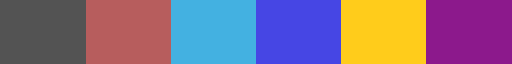

In [109]:
my_cmap

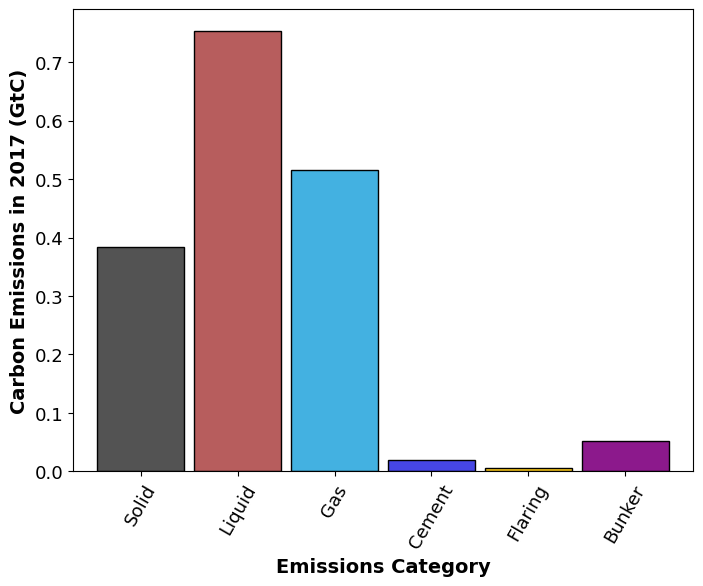

In [110]:
#Bar graph:
####

fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

df_long.plot.bar(x = 'Category', y = 'Emissions', fontsize=13, ax=ax1, edgecolor='black', width=.9,
                 color=my_cmap([i for i in range(6)]), legend=False, rot=60)

ax1.set_xlabel('Emissions Category', fontweight='bold', fontsize=14)
ax1.set_ylabel('Carbon Emissions in 2017 (GtC)', fontweight='bold', fontsize=14);


In [113]:
df_long.set_index('Category')

Emissions
Category           
Solid      0.384231
Liquid     0.752407
Gas        0.515662
Cement     0.019195
Flaring    0.005650
Bunker     0.052042

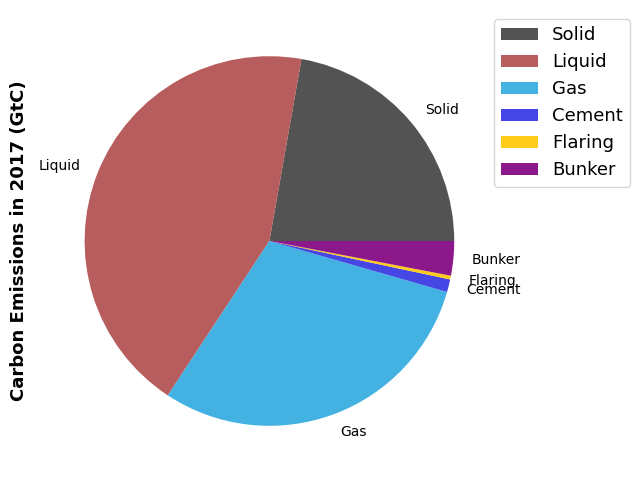

In [114]:
#Pie graph:
####

fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

#Note that we set the index:
df_long.set_index('Category').plot.pie(y = 'Emissions', fontsize=10, ax=ax1, cmap=my_cmap)

ax1.legend(fontsize=13, loc='upper right', bbox_to_anchor=(1.3, 1))

ax1.set_ylabel('Carbon Emissions in 2017 (GtC)', fontweight='bold', fontsize=13);


### Now, map it for every continent!

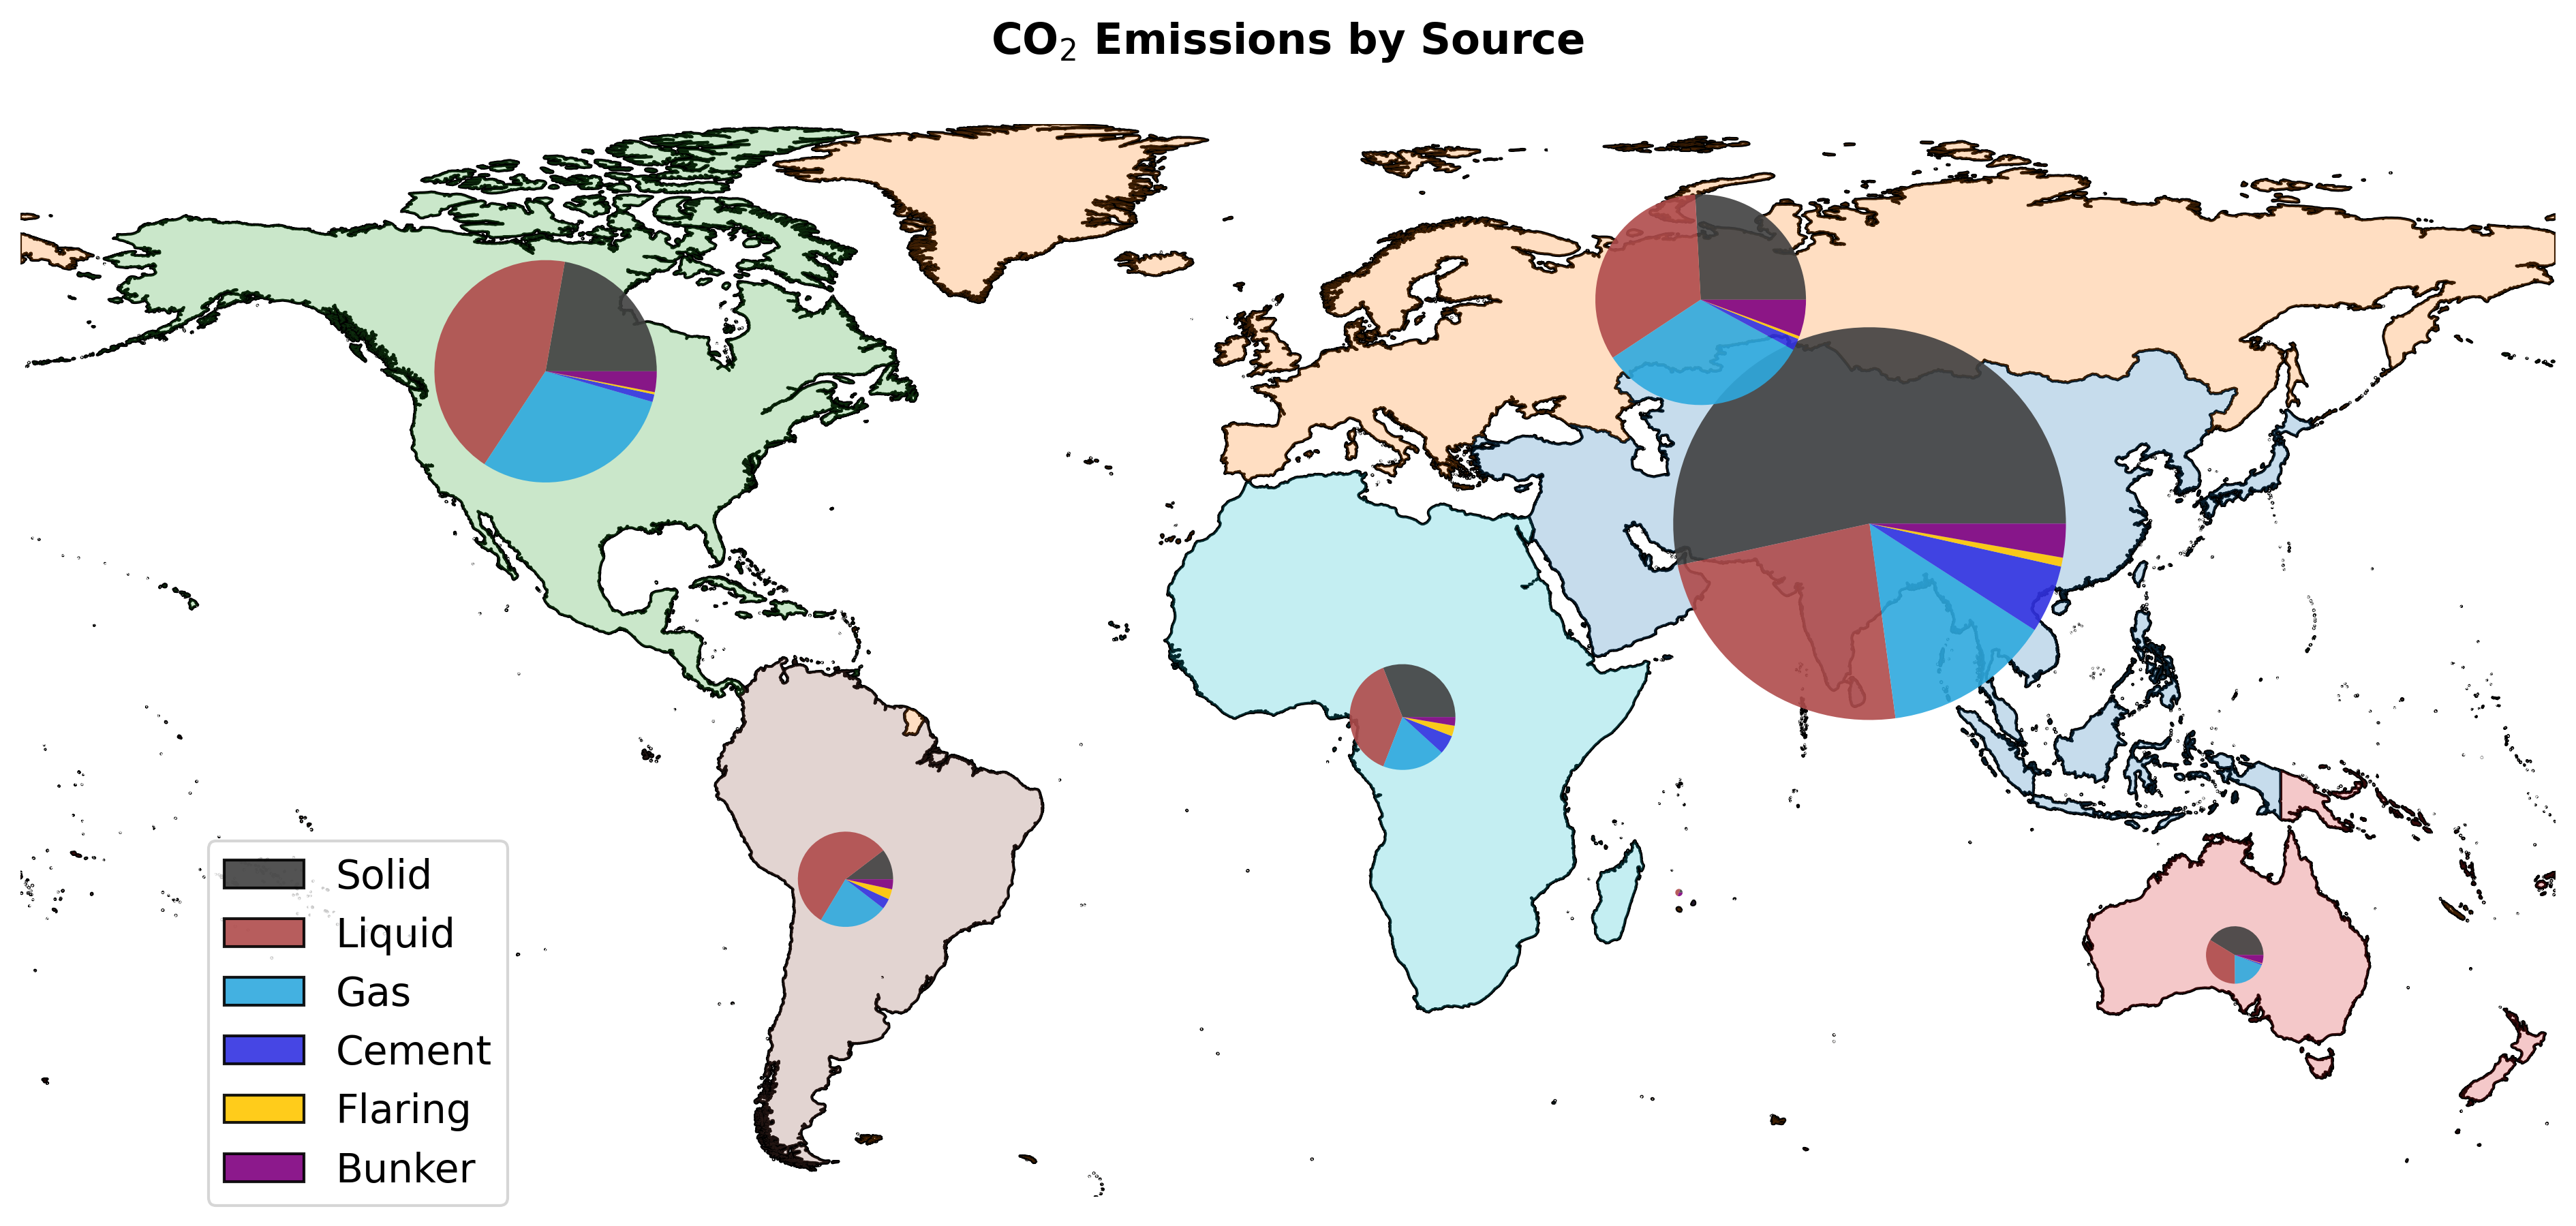

In [118]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#Use matplotlib colorcycle for background colors: Essentially arbitrary
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
    
    

#Main Plot:
##########
fig, ax1 = plt.subplots(1,1, figsize=(16, 12), dpi=300)

#Continent outlines:
gdf_continent = gdf_continent.set_geometry('geometry')
gdf_continent.plot(ax=ax1, linewidth=1, facecolor='None')


#All the inset plots:
#########
for i, c in enumerate(gdf_continent.CONTINENT):
    
    #Setup inset axis:
    #######
    x0_abs = gdf_continent.iloc[i].cent.x
    y0_abs = gdf_continent.iloc[i].cent.y
    
    x_span = gdf_continent.total_bounds[2] - gdf_continent.total_bounds[0]
    y_span = gdf_continent.total_bounds[3] - gdf_continent.total_bounds[1]
    
    x0 = (x0_abs - (gdf_continent.total_bounds[0])) / x_span -.05
    y0 = (y0_abs - (gdf_continent.total_bounds[1])) / y_span -.1
    
    
    axins = inset_axes(ax1, bbox_to_anchor=(x0,y0,.1,.2), width="100%", height="100%",
                      bbox_transform = ax1.transAxes)
    
    
    #Background color
    ####
    gdf_continent.iloc[[i]].plot(ax=ax1, linewidth=1, facecolor=colors[i-1], alpha=.25)
    


    #Draw the pie chart
    ##########
    df = gdf_continent.loc[gdf_continent.CONTINENT == c]

    ####
    #Melt for pie chart:
    ########
    
    cols = ['Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker'] #Leave off 'Total'
    cols_C = ['Solid_C', 'Liquid_C', 'Gas_C', 'Cement_C', 'Flaring_C', 'Bunker_C'] #Leave off 'Total_C'
    
    #If current rate:
    if (1):
        df_long = pd.melt(df, value_vars = cols,
            var_name='Category', value_name='Emissions')
        
        df_long.plot.pie(y = 'Emissions', fontsize=13, ax=axins, cmap=my_cmap,
                         radius = np.sqrt(df['Total'].values[0] / 1e6), legend=False, labels=None) #autopct='%.1f%%')

        #Bar graph as alternate:
        ####
        #df_long.plot.bar(x = 'Category', y = 'Emissions', fontsize=13, ax=axins, edgecolor='black', width=.9,
        #                 color=my_cmap([i for i in range(6)]), legend=False)
        
        #axins.set_xticks([])
        
    #If cumulative:
    else:
        df_long = pd.melt(df, value_vars = cols_C,
            var_name='Category', value_name='Emissions')
        
        df_long.plot.pie(y = 'Emissions', fontsize=13, ax=axins, cmap=my_cmap,
                         radius = np.sqrt(df['Total_C'].values[0] / 50), legend=False, labels=None) #autopct='%.1f%%')

        #Bar graph as alternate:
        ####
        #df_long.plot.bar(x = 'Category', y = 'Emissions', fontsize=13, ax=axins, edgecolor='black', width=.9,
        #                 color=my_cmap([i for i in range(6)]), legend=False)
        
        #axins.set_xticks([])

    
        
    axins.set_xlabel('', fontweight='bold')
    axins.set_ylabel('')
    axins.yaxis.set_ticklabels([]);
    
    

                   
#Need this part!
###
gdf_continent = gdf_continent.set_geometry('geometry')
ax1.set_xlim([gdf_continent.total_bounds[0], gdf_continent.total_bounds[2]])
ax1.set_ylim([gdf_continent.total_bounds[1], gdf_continent.total_bounds[3]])

#Finally, a custom Legend
#####

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=my_cmap(i), edgecolor='black', alpha=.9, label=cols[i]) for i in range(6)]
ax1.legend(handles=legend_elements, bbox_to_anchor=(.2, 0.35), fontsize=14)

ax1.set_axis_off()
ax1.set_title('CO$_2$ Emissions by Source', fontweight='bold', fontsize=15, y=1.05);